#### Sử dụng SOM để train trước khi áp dụng LVQ

In [62]:
import numpy as np
from sklearn.metrics import euclidean_distances
import pandas as pd

import sys
sys.path.insert(0, '../SOM-LVQ')
import SOM_LVQ
from minisom import MiniSom
from supervisedSom import supervisedSom

In [63]:
data = pd.read_csv(r"../data/UCI/dermatology.data.csv", header=None)

In [64]:
data.head()

,0,1,2,3,4,5,6,7,8,9,...,25,26,27,28,29,30,31,32,33,34
0,2,2,0,3,0,0,0,0,1,0,...,0,0,3,0,0,0,1,0,55,2
1,3,3,3,2,1,0,0,0,1,1,...,0,0,0,0,0,0,1,0,8,1
2,2,1,2,3,1,3,0,3,0,0,...,0,2,3,2,0,0,2,3,26,3
3,2,2,2,0,0,0,0,0,3,2,...,3,0,0,0,0,0,3,0,40,1
4,2,3,2,2,2,2,0,2,0,0,...,2,3,2,3,0,0,2,3,45,3


####  Using the 34th field (drinks) as dependent variable

In [65]:
x = data.iloc[:, 0:33].values
y = data[34].values
from sklearn.cross_validation import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=1)

# use Minmaxscaler because we use euclidean distance
from sklearn.preprocessing import MinMaxScaler
minmax = MinMaxScaler()
x_train = minmax.fit_transform(x_train)
x_test = minmax.transform(x_test)

C:\Users\Thend\Anaconda3\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by MinMaxScaler.
  warnings.warn(msg, DataConversionWarning)


In [66]:
# Training the SOM
from minisom import MiniSom
som1 = MiniSom(x = 15, y = 15, input_len = 33, sigma = 1.0, learning_rate = 0.5)
som1.random_weights_init(x_train)
som1.train_random(data = x_train, num_iteration = 200)

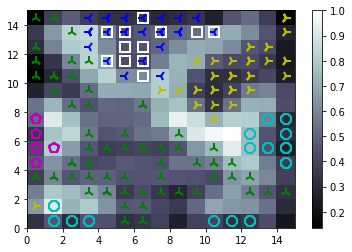

In [67]:
suso1 = supervisedSom(som1, x_train, y_train)

label1= suso1.visualSom()

In [68]:
taggings1 = suso1.taggingSom()

p_vectors = SOM_LVQ.init_LVQ_pvectors(som1, taggings1, x_train, y_train)

In [69]:
lvq1 = SOM_LVQ.SOM_LVQ(x_train, y_train, n_classes=6, n_neurons=0, p_vectors=p_vectors, epsilon=0.9, epsilon_dec_factor=0.001)
# neurons = lvq1.fit(x_train, y_train)
neurons = lvq1.train_LVQ_neighbors(x_train, y_train)
# neurons = lvq1.train_LVQ2(x_train, y_train)

In [70]:
predicted_y1 = [lvq1.predict(instance) for instance in x_test]

from sklearn.metrics import classification_report

print (classification_report(y_test, predicted_y1, target_names=['0', '1', '2', '3', '4', '5', '6']))

             precision    recall  f1-score   support

          0       0.96      1.00      0.98        27
          1       0.83      0.94      0.88        16
          2       1.00      1.00      1.00        21
          3       0.92      0.86      0.89        14
          4       1.00      1.00      1.00        12
          5       0.00      0.00      0.00         2

avg / total       0.93      0.95      0.94        92



C:\Users\Thend\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1428: UserWarning: labels size, 6, does not match size of target_names, 7
  .format(len(labels), len(target_names))
C:\Users\Thend\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [30]:
from sklearn.ensemble import RandomForestClassifier

In [73]:
rndFst = RandomForestClassifier(max_depth=100, n_estimators=100, max_features=33)

In [74]:
rndFst.fit(x_train, y_train)

y_pred = rndFst.predict(x_test)
acc_random_forest = round(rndFst.score(x_test, y_test) * 100, 2)
acc_random_forest

97.83

In [33]:
from sklearn.svm import SVC

In [34]:
svc = SVC()
svc.fit(x_train, y_train)
Y_pred = svc.predict(x_test)
acc_svc = round(svc.score(x_test, y_test) * 100, 2)
acc_svc
print (classification_report(y_test, Y_pred, target_names=['0', '1', '2', '3', '4', '5', '6']))

             precision    recall  f1-score   support

          0       1.00      1.00      1.00        27
          1       0.73      1.00      0.84        16
          2       1.00      1.00      1.00        21
          3       1.00      0.57      0.73        14
          4       1.00      1.00      1.00        12
          5       1.00      1.00      1.00         2

avg / total       0.95      0.93      0.93        92



C:\Users\Thend\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1428: UserWarning: labels size, 6, does not match size of target_names, 7
  .format(len(labels), len(target_names))
